Now we will demonstrate some actual calculations of Riemann sums for a few different integrals.

In [84]:
#import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
%matplotlib inline

In [86]:
def Riemann_left(func,a,b,n):
    """Calculate the Riemann left sum for function func in region (a,b) with partition number n, an integer"""
    dx = (b-a)/n
    x = np.linspace(a,b-dx,n) # make a vector of points to evaluate sum on
    y = func(x) #evaluate x on each of these points
    return np.sum(y * dx) #sum the list of the points evaluated

def Riemann_right(func,a,b,n):
    """Calculate the Riemann right sum for function func in region (a,b) with partition number n, an integer"""
    dx = (b-a)/n
    x = np.linspace(a+dx,b,n)
    y = func(x)
    return np.sum(y * dx)

#now for an actual numerical integration routine
def num_integrate(func,a,b):
    result = quad(lambda x: func(x), a, b)
    return result[0]

In [89]:
def plot_sums(func,n,a,b,ax):
    """function plot sums for a function, given a function, an axis,a,b, and list of n"""
    #calculate the Riemann sums for each element of n
    sums_left = [Riemann_left(func,a,b,i) for i in n]
    sums_right = [Riemann_right(func,a,b,i) for i in n]
    num_ans = num_integrate(func,a,b)
    sums_ac = [num_ans for i in n]
    #generate function plot
    x = np.linspace(a,b,100)
    ax[0].plot(x,func(x))
    ax[1].plot(n,sums_left)
    ax[1].plot(n,sums_right)
    ax[1].plot(n,sums_ac)

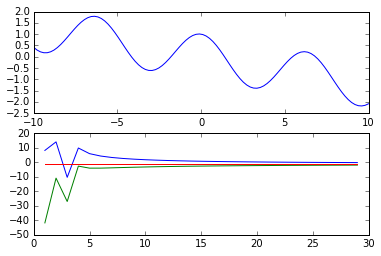

In [93]:
#define our function
def func(x):
    return np.cos(x) - x/8

#define a and b
a = -10
b = 10
n = [i for i in range(1,30)]
#define axis for plotting
fig, ax = plt.subplots(2,1)
plot_sums(func,n,a,b,ax)